In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from keras.models import Sequential, Model
from keras.layers import Dense,BatchNormalization,Dropout,Activation, Input
from keras.regularizers import l1,l2

from sklearn.model_selection import train_test_split, KFold


from imblearn.over_sampling import RandomOverSampler
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [2]:
random.seed(10)

In [3]:
data=pd.read_excel("/content/data-subject1.xlsx")
data

,Death Event,Sex,Smoking,Diabetes,High blood pressure,Anemia,Age,Ejection fraction,Serum sodium,Serum creatinine,Platelets,CPK,Time
0,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358,97
1,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231,180
2,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,31
3,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305,87
4,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582,250
295,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582,244
296,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582,14
297,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897,80


In [4]:
data.isna().sum()

Death Event             0
Sex                     0
Smoking                 0
Diabetes                0
High blood pressure     0
Anemia                  0
Age                     0
Ejection fraction       0
Serum sodium            0
Serum creatinine        0
Platelets               0
CPK                     0
Time                    0
dtype: int64

In [5]:
data.describe()

,Death Event,Sex,Smoking,Diabetes,High blood pressure,Anemia,Age,Ejection fraction,Serum sodium,Serum creatinine,Platelets,CPK,Time
count,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000
mean,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465,130.260870
std,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881,77.614208
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000,4.000000
25%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000,73.000000
50%,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000,115.000000
75%,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000,203.000000
max,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000,285.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Death Event           299 non-null    int64  
 1   Sex                   299 non-null    int64  
 2   Smoking               299 non-null    int64  
 3   Diabetes              299 non-null    int64  
 4   High blood pressure   299 non-null    int64  
 5   Anemia                299 non-null    int64  
 6   Age                   299 non-null    float64
 7   Ejection fraction     299 non-null    int64  
 8   Serum sodium          299 non-null    int64  
 9   Serum creatinine      299 non-null    float64
 10  Platelets             299 non-null    float64
 11  CPK                   299 non-null    int64  
 12  Time                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
corr=data.corr()
corr["Death Event"].sort_values()

Time                   -0.526964
Ejection fraction      -0.268603
Serum sodium           -0.195204
Platelets              -0.049139
Smoking                -0.012623
Sex                    -0.004316
Diabetes               -0.001943
CPK                     0.062728
Anemia                  0.066270
High blood pressure     0.079351
Age                     0.253729
Serum creatinine        0.294278
Death Event             1.000000
Name: Death Event, dtype: float64

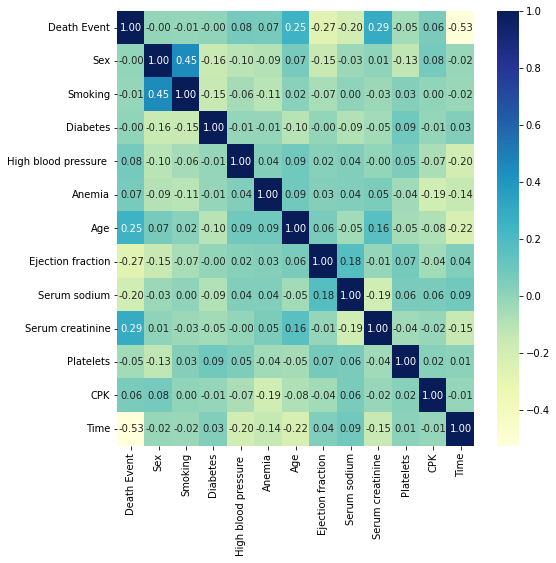

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap="YlGnBu",fmt='.2f', annot=True)
plt.savefig("correlation matrix")
plt.show()

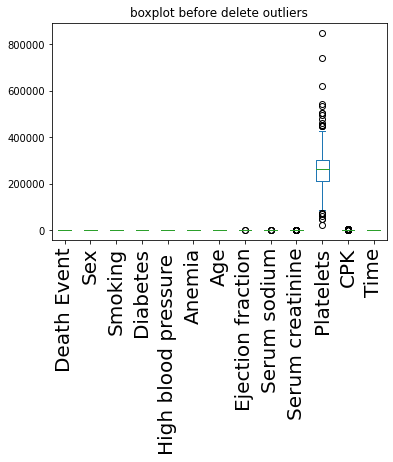

In [9]:
data.plot.box()
plt.xticks(rotation=90,size=20)
plt.title("boxplot before delete outliers")
plt.savefig("boxplot before delete outliers")

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

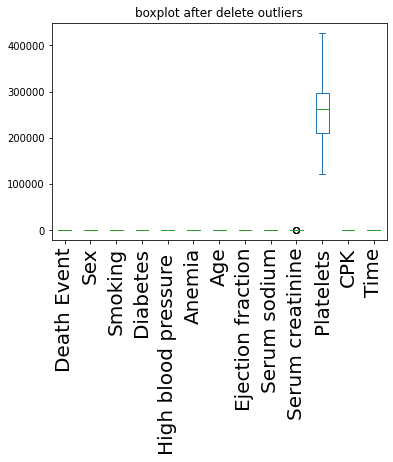

In [11]:
data.plot.box()
plt.xticks(rotation=90,size=20)
plt.title("boxplot after delete outliers")
plt.savefig("boxplot after delete outliers")
plt.show()

In [12]:
data["Death Event"].value_counts()/len(data)

0    0.727679
1    0.272321
Name: Death Event, dtype: float64

In [13]:
data.shape

(224, 13)

In [14]:
target=data["Death Event"].values
input=data.iloc[:,1:].values


In [15]:

def built_model(input_dim):
  encoding_dim1 = 64
  encoding_dim2 = 32
  encoding_dim3 = 16
  decoding_dim1 = 32
  decoding_dim2 = 64

  input_layer = Input(shape=(input_dim,))
  encoded1 = Dense(encoding_dim1, activation='relu')(input_layer)
  encoded2 = Dense(encoding_dim2, activation='relu',kernel_regularizer=regularizers.l1(0.01))(encoded1)
  encoded3 = Dense(encoding_dim3, activation='relu')(encoded2)
  encoded3=BatchNormalization()(encoded3)
  encoded3=Dropout(0.2)(encoded3)


  decoded1 = Dense(decoding_dim1, activation='relu')(encoded3)
  decoded2 = Dense(decoding_dim2, activation='relu')(decoded1)
  decoded2=Dropout(0.2)(decoded2)

  decoded3 = Dense(input_dim, activation='sigmoid')(decoded2)
  decoded3=BatchNormalization()(decoded3)
  autoencoder = Model(input_layer, decoded3)
  encoder = Model(input_layer, encoded3)
  return autoencoder, encoder


In [16]:




ros=RandomOverSampler(sampling_strategy='minority')
X_sm,Y_sm=ros.fit_resample(input,target)



np.unique(Y_sm,return_counts=True)

(array([0, 1]), array([163, 163]))

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X_sm,Y_sm,test_size=0.2,random_state=42)

scaler1=MinMaxScaler()
scaler1.fit(xtrain)
xtrain=scaler1.transform(xtrain)

autoencoder, encoder =built_model(xtrain.shape[1])
autoencoder.compile(loss="mse",
                  optimizer=Adam(learning_rate=0.001),
                  metrics=["accuracy"])

history1=autoencoder.fit(xtrain,xtrain,epochs=300,batch_size=16,
          verbose=0)

=========test=============
2/2 [==============================] - 0s 6ms/step


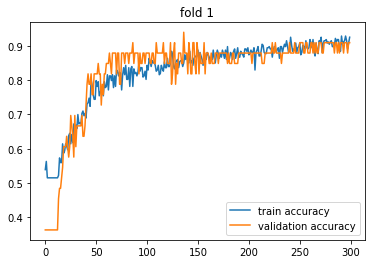

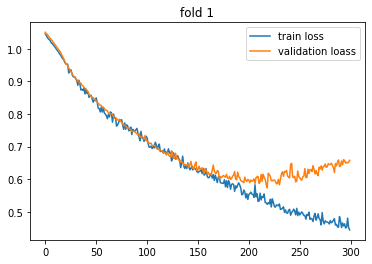

=========test=============
2/2 [==============================] - 0s 6ms/step


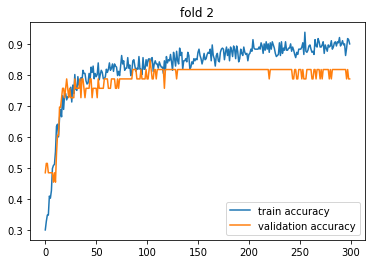

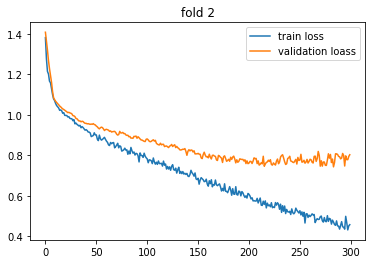

=========test=============
2/2 [==============================] - 0s 8ms/step


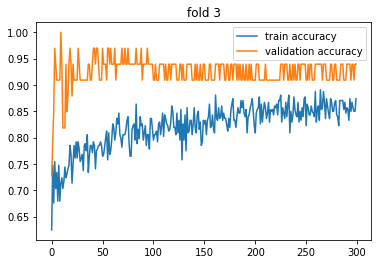

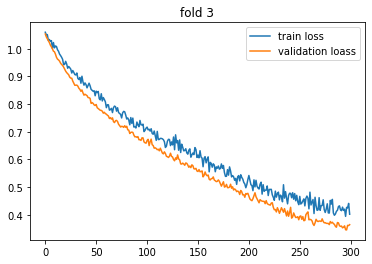

=========test=============
2/2 [==============================] - 0s 10ms/step


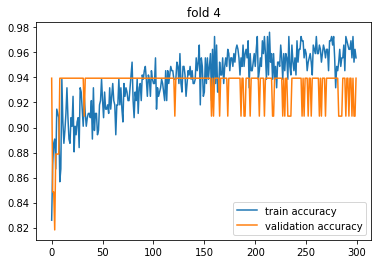

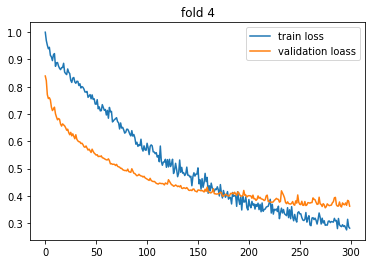

=========test=============
2/2 [==============================] - 0s 7ms/step - loss: 0.3486 - accuracy: 0.9394


2/2 [==============================] - 0s 7ms/step


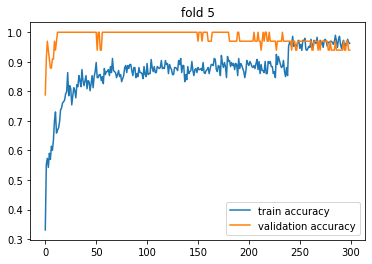

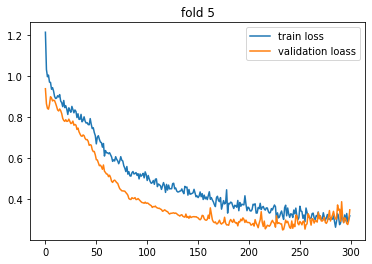

=========test=============
2/2 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.9394


2/2 [==============================] - 0s 8ms/step


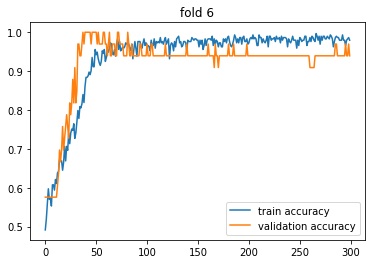

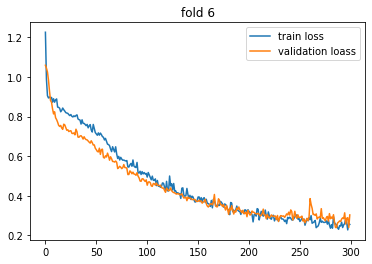

=========test=============
1/1 [==============================] - 0s 90ms/step


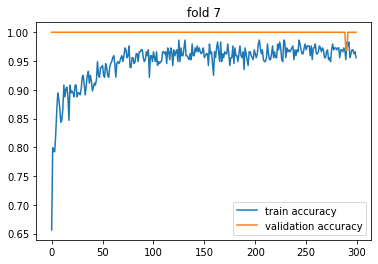

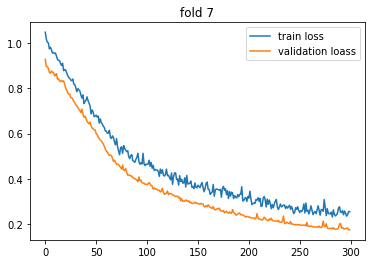

=========test=============
1/1 [==============================] - 0s 97ms/step


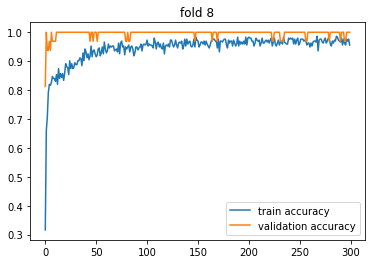

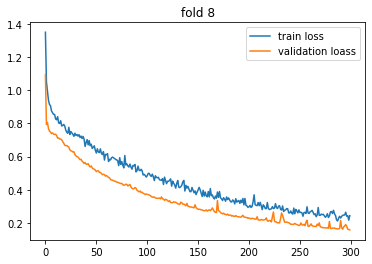

=========test=============
1/1 [==============================] - 0s 83ms/step


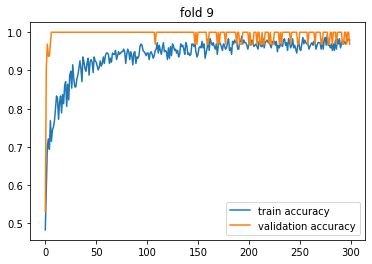

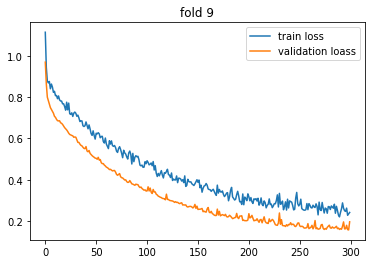

=========test=============
1/1 [==============================] - 0s 88ms/step


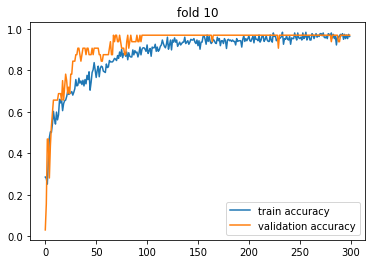

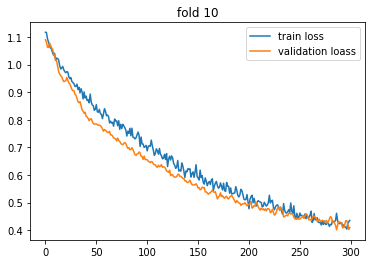

In [18]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
folds_accs = []
folds_recall = []
folds_precision = []
folds_f1 = []


i=1


Confusion_Matrix=np.array([[0,0],[0,0]])
for train_idx, test_idx in kfold.split(X_sm, Y_sm):
  x_train, x_test = X_sm[train_idx], X_sm[test_idx]
  y_train, y_test = Y_sm[train_idx], Y_sm[test_idx]
  scaler=MinMaxScaler()
  scaler.fit(x_train)
  x_train=scaler.transform(x_train)
  x_test=scaler.transform(x_test)

  
  
  input_data = Input(shape=(x_train.shape[1]))
  encode = encoder(input_data)
  encode=Dense(8, activation='relu',kernel_regularizer=regularizers.l1(0.01))(encode)
  
  encode=Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.01))(encode)

  encode=Dropout(0.2)(encode)
  out = Dense(1, activation='sigmoid')(encode)
  model = Model(input_data, out)

  model.compile(loss="binary_crossentropy",
                optimizer=Adam(learning_rate=0.0001),
                metrics=["accuracy"])
  

  history2=model.fit(x_train,y_train,epochs=300,batch_size=16,verbose=0,validation_data=(x_test,y_test))
  print("=========test=============")
  acc,score=model.evaluate(x_test,y_test)

  folds_accs.append(score)

  predicted=(model.predict(x_test) > 0.5).astype("int32")
  Confusion_Matrix +=np.array(confusion_matrix(y_test,predicted))
  folds_f1.append(f1_score(y_test,predicted))
  folds_recall.append(recall_score(y_test,predicted))
  folds_precision.append(precision_score(y_test,predicted))

  train_acc=history2.history["accuracy"]
  val_acc=history2.history["val_accuracy"]
  train_loss=history2.history["loss"]
  val_loss=history2.history["val_loss"]

  EPOCHS=range(len(train_acc))
  plt.plot(EPOCHS,train_acc,
           val_acc)
  title=f"fold {i}"
  plt.legend(["train accuracy","validation accuracy"])
  plt.title(title)
  plt.savefig(f"accuracy {title}")
  plt.show()
  plt.plot(EPOCHS,train_loss ,
          val_loss )
  plt.legend(["train loss","validation loass"])
  plt.title(title)
  plt.savefig(f"loss {title}")
  plt.show()
  i+=1


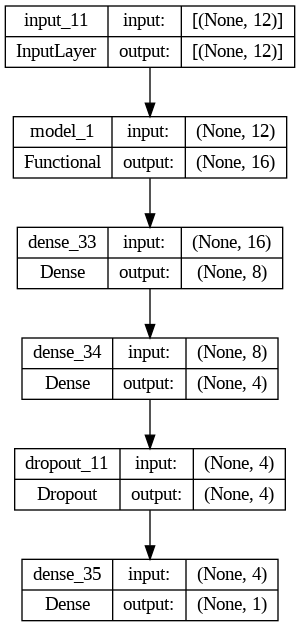

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


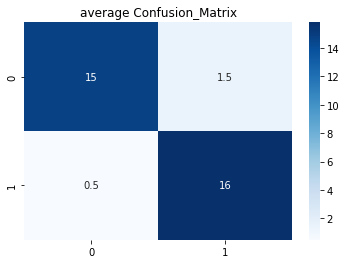

In [20]:
Confusion_Matrix_avg=Confusion_Matrix/10
sns.heatmap(Confusion_Matrix_avg,cmap="Blues",annot=True)
plt.title("average Confusion_Matrix")
plt.savefig("Confusion_Matrix ")
plt.show()

In [21]:
print(f"average accuracy : {np.mean(folds_accs)}")
print(f"average recall : {np.mean(folds_recall)}")
print(f"average precision : {np.mean(folds_precision)}")
print(f"average f1 score : {np.mean(folds_f1)}")


average accuracy : 0.9392045497894287
average recall : 0.9720448179271708
average precision : 0.9079751461988304
average f1 score : 0.9368121478188897


In [22]:
folds_accs

[0.9090909361839294,
 0.7878788113594055,
 0.939393937587738,
 0.939393937587738,
 0.939393937587738,
 0.939393937587738,
 1.0,
 1.0,
 0.96875,
 0.96875]